In [61]:
# DEPENDENCIES & SETUP #
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# READ IN DATA #
# File to Load (Remember to Change These)
file_to_load = "degrees-that-pay-back.csv"

# Read Purchasing File and store into Pandas data frame
degrees_data = pd.read_csv(file_to_load)
degrees_data.head(10)
#degrees_data.dtypes

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


In [50]:
#Change Column Names

degrees_data.columns = ['degree','start','midcareer','starttomid_chng','midcareer_p10','midcareer_p25','midcareer_p75','midcareer_p90']

degrees_data.head()

#degrees_data.dtypes

,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [51]:
#Change variables from objects to integers
column_names = ['start','midcareer','midcareer_p10','midcareer_p25','midcareer_p75','midcareer_p90']

for column in column_names:
    degrees_data[column] = degrees_data[column].str.replace("$","")
    degrees_data[column] = degrees_data[column].str.replace(",","")
    degrees_data[column] = pd.to_numeric(degrees_data[column])
    

In [52]:
degrees_data.head()
#degrees_data.dtypes

,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [53]:
#Overall Descriptive Statitics - All Majors combined
degrees_data.describe()

,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [54]:
#Sort by Starting salary
sorted_start = degrees_data.sort_values('start', ascending = False)
sorted_start.head()

,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
38,Mechanical Engineering,57900.0,93600.0,61.7,63700.0,76200.0,120000.0,163000.0


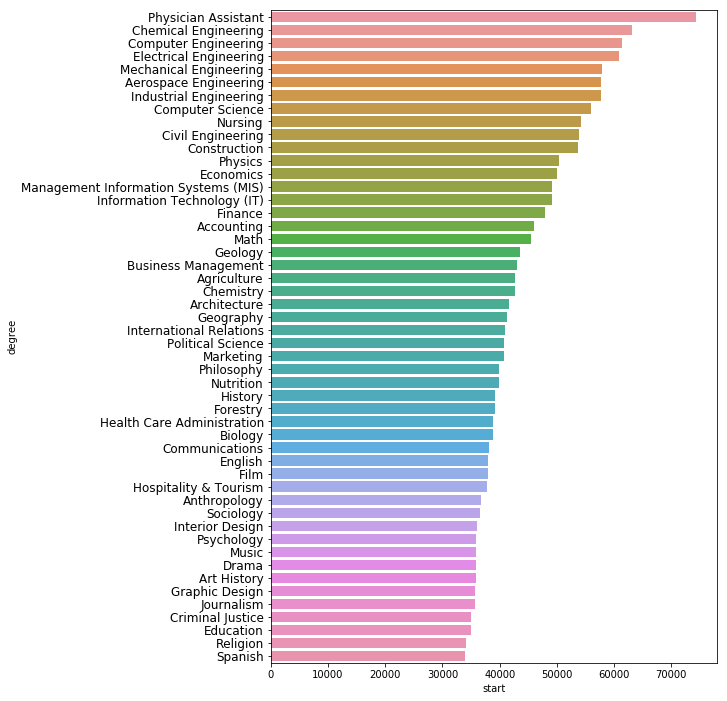

In [37]:
#Sort by Starting salary
sorted_start = degrees_data.sort_values("start", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(8, 12)) 
ax.set_yticklabels(sorted_start['degree'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = sorted_start['degree'], x= sorted_start['start'])

#plt.tight_layout()
plt.savefig("Starting_Salary_byDegree.png")
plt.show()

In [25]:
#Sort by midcareer salary
sorted_midcareer = degrees_data.sort_values('midcareer', ascending = False)
sorted_midcareer.head()


,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0


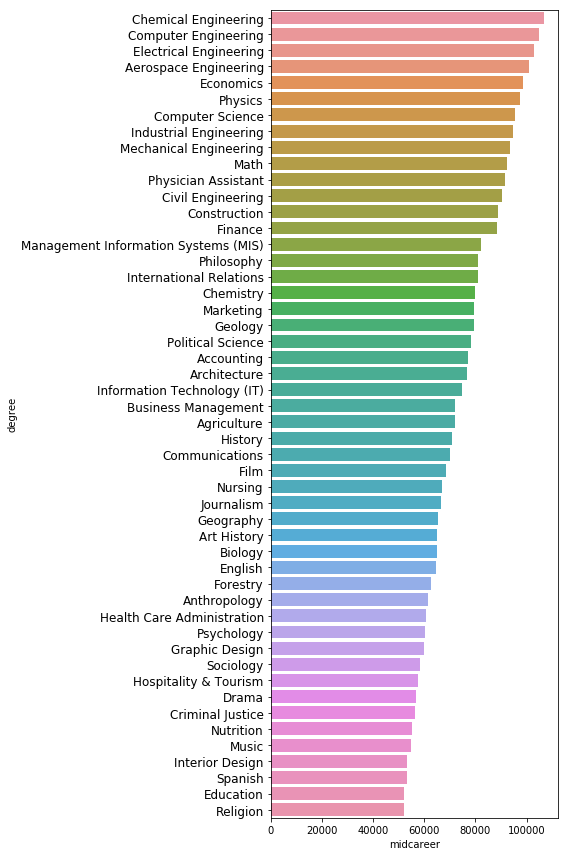

In [60]:
#Sort by MidCareer salary
sorted_midcareer = degrees_data.sort_values("midcareer", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(8, 12)) 
ax.set_yticklabels(sorted_midcareer['degree'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = sorted_midcareer['degree'], x= sorted_midcareer['midcareer'])

plt.tight_layout()
plt.savefig("MidCareer_Salary_byDegree.png")
plt.show()

In [29]:
#Sort by midcareer_p90 salary
sorted_midcareer_p90 = degrees_data.sort_values('midcareer_p90', ascending = False)
sorted_midcareer_p90.head()

,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
22,Finance,47900.0,88300.0,84.3,47200.0,62100.0,128000.0,195000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
44,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0


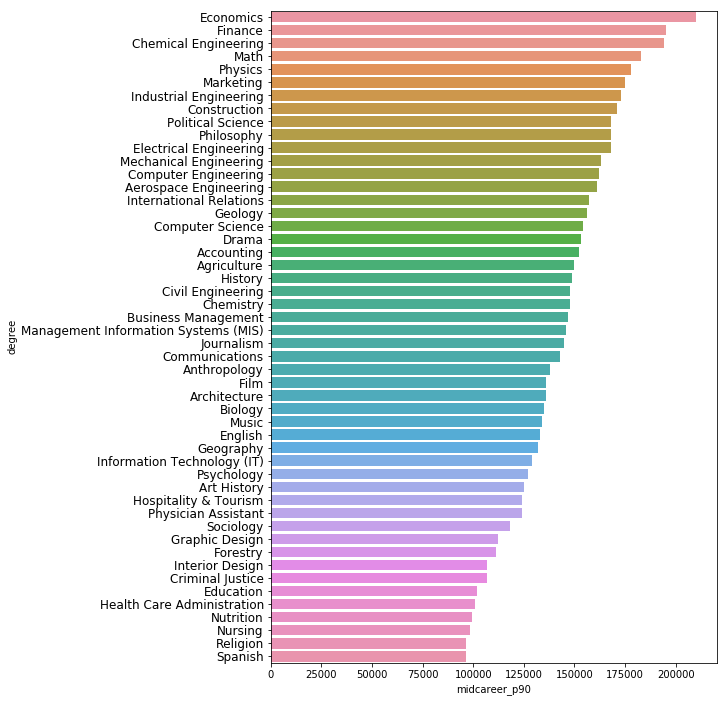

In [38]:
#Sort by midcareer_p90 salary
sorted_midcareer_p90 = degrees_data.sort_values("midcareer_p90", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(8, 12)) 
ax.set_yticklabels(sorted_midcareer_p90['degree'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = sorted_midcareer_p90['degree'], x= sorted_midcareer_p90['midcareer_p90'])

plt.savefig("MidCareer90_Salary_byDegree.png")
plt.show()

In [31]:
#Sort by Starting salary to MidCareer Change 
sorted_starttomid_chng = degrees_data.sort_values('starttomid_chng', ascending = False)
sorted_starttomid_chng.head()


,degree,start,midcareer,starttomid_chng,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


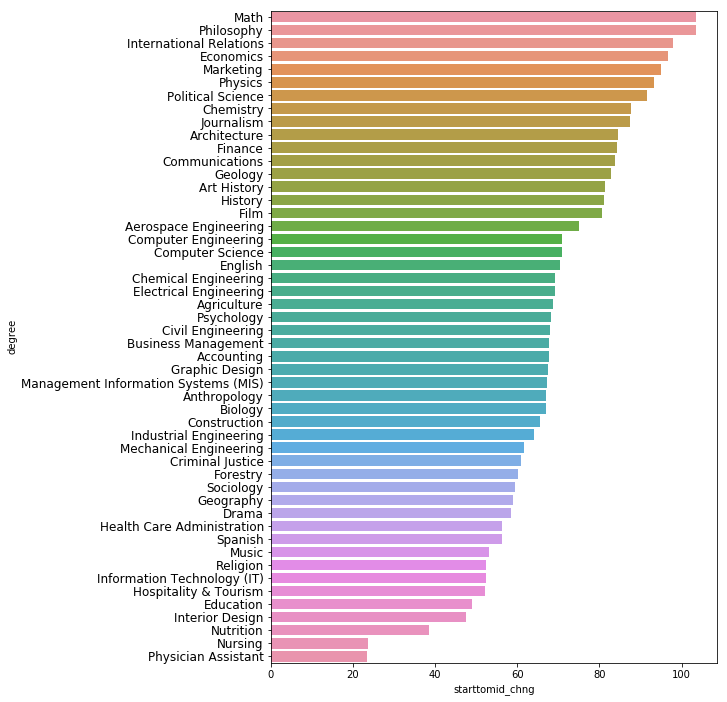

In [39]:
#Sort by Starting salary to MidCareer Change 
sorted_starttomid_chng = degrees_data.sort_values("starttomid_chng", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(8, 12)) 
ax.set_yticklabels(sorted_starttomid_chng['degree'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = sorted_starttomid_chng['degree'], x= sorted_starttomid_chng['starttomid_chng'])

plt.savefig("Start_to_MidCareer_byDegree.png")
plt.show()


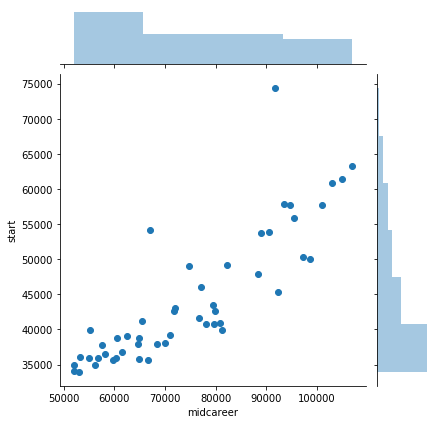

In [55]:
#Starting vs Mid-Career Median Salary Correlation


sns.jointplot(y='start',x='midcareer',data=degrees_data,kind='scatter')
plt.savefig("Start_to_MidCareer_Correlation.png")


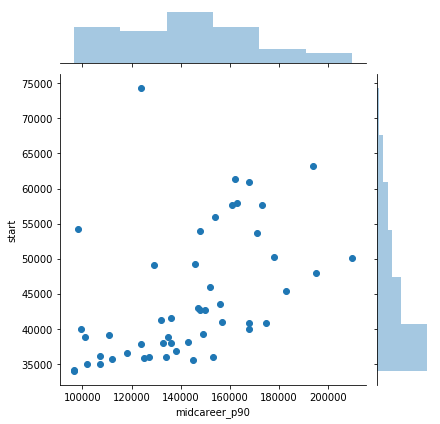

In [41]:
#Starting vs Mid-Career90 Median Salary Correlation
sns.jointplot(y='start',x='midcareer_p90',data=degrees_data,kind='scatter')